In [53]:
import sys
sys.path.append('..')
from PIL import Image
from torchvision import transforms as tfs

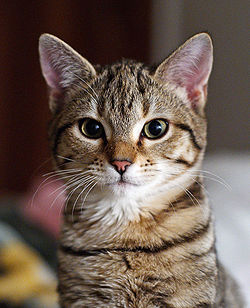

In [5]:
im = Image.open("cat.jpg")
im

Before scale, shape: (250, 308)
After scale, shape: (200, 100)


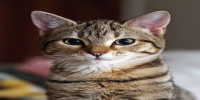

In [6]:
#Resize
print('Before scale, shape: {}'.format(im.size))
new_im = tfs.Resize((100,200))(im)
print('After scale, shape: {}'.format(new_im.size))
new_im

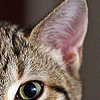

In [7]:
#Random Crop
random_im = tfs.RandomCrop(100)(im)#100*100
random_im

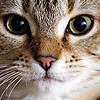

In [8]:
#center crop
center_crop = tfs.CenterCrop(100)(im)
center_crop

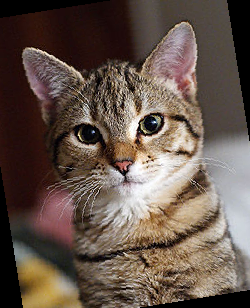

In [12]:
#Random Flip horizontal
h_flip = tfs.RandomHorizontalFlip()(im)
h_flip
#vertical
v_flip = tfs.RandomVerticalFlip()(im)
v_flip
#Random Rotation
rot_im = tfs.RandomRotation(40)(im)#-40-40
rot_im

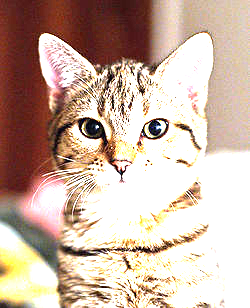

In [19]:
#brightness
bright_im = tfs.ColorJitter(2)(im)
bright_im

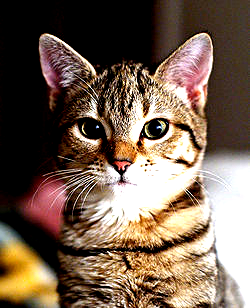

In [21]:
#contrast
contrast_im = tfs.ColorJitter(contrast=2)(im)
contrast_im

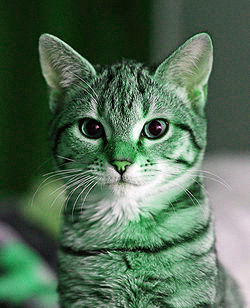

In [22]:
#Hue
hue_im = tfs.ColorJitter(hue = 0.5)(im)
hue_im

In [23]:
#Composite
im_aug = tfs.Compose([
    tfs.Resize(120),
    tfs.RandomHorizontalFlip(),
    tfs.RandomCrop(90),
    tfs.ColorJitter(brightness=0.5,contrast=0.5,hue = 0.5)
])

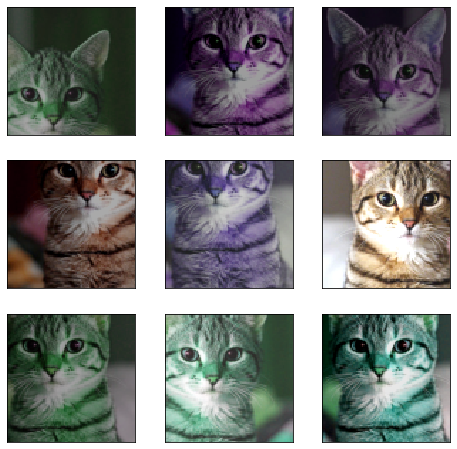

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
nrows = 3
ncols = 3
figsize = (8,8)
_,figs = plt.subplots(nrows, ncols, figsize = figsize)
for i in range(nrows):
    for j in range (ncols):
        figs[i][j].imshow(im_aug(im))
        figs[i][j].axes.get_xaxis().set_visible(False)
        figs[i][j].axes.get_yaxis().set_visible(False)
plt.show()

In [68]:
#***Training Model Test***
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.datasets import CIFAR10
import torchvision 
from torchvision import transforms as tfs
from utils import train, resnet


#data augmented
def train_tf(x):
    im_aug = tfs.Compose([
        tfs.Resize(120),
        tfs.RandomHorizontalFlip(),
        tfs.RandomCrop(96),
        tfs.ColorJitter(brightness=0.5, contrast=0.5, hue=0.5),
        tfs.ToTensor(),
        tfs.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
    x = im_aug(x)
    return x

def test_tf(x):
    im_aug = tfs.Compose([
        tfs.Resize(96),
        tfs.ToTensor(),
        tfs.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
    x = im_aug(x)
    return x

train_set = CIFAR10('./data', train=True, transform=train_tf)
train_data = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_set = CIFAR10('./data', train=False, transform=test_tf)
test_data = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)

net = resnet(3, 10)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
train(net, train_data, test_data, 10, optimizer, criterion)


IndexError: invalid index of a 0-dim tensor. Use tensor.item() to convert a 0-dim tensor to a Python number